In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
pd.set_option('display.max_columns', 500)
import sys, os
from sklearn.linear_model import LogisticRegression
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
from derm7pt.dataset import Derm7PtDataset, Derm7PtDatasetGroupInfrequent
from derm7pt.vis import plot_confusion
from derm7pt.kerasutils import deep_features

In [3]:
# CHANGE THIS LINE TO YOUR DATA DIRECTORY.
dir_release = "D:/COLLEGE/PROJECTS/(incomplete) 7 point checklist/derm7pt/release_v0"
dir_meta = os.path.join(dir_release, 'meta')
dir_images = os.path.join(dir_release, 'images')

In [4]:
meta_df = pd.read_csv(os.path.join(dir_meta, 'meta.csv'))
train_indexes = list(pd.read_csv(os.path.join(dir_meta, 'train_indexes.csv'))['indexes'])
valid_indexes = list(pd.read_csv(os.path.join(dir_meta, 'valid_indexes.csv'))['indexes'])
test_indexes = list(pd.read_csv(os.path.join(dir_meta, 'test_indexes.csv'))['indexes'])

In [5]:
print(len(train_indexes), len(valid_indexes), len(test_indexes))

413 203 395


In [6]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   case_num                        1011 non-null   int64 
 1   diagnosis                       1011 non-null   object
 2   seven_point_score               1011 non-null   int64 
 3   pigment_network                 1011 non-null   object
 4   streaks                         1011 non-null   object
 5   pigmentation                    1011 non-null   object
 6   regression_structures           1011 non-null   object
 7   dots_and_globules               1011 non-null   object
 8   blue_whitish_veil               1011 non-null   object
 9   vascular_structures             1011 non-null   object
 10  level_of_diagnostic_difficulty  1011 non-null   object
 11  elevation                       1011 non-null   object
 12  location                        1011 non-null   

In [7]:
meta_df.drop(axis = 1, columns = ['case_id', 'notes'], inplace = True)
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   case_num                        1011 non-null   int64 
 1   diagnosis                       1011 non-null   object
 2   seven_point_score               1011 non-null   int64 
 3   pigment_network                 1011 non-null   object
 4   streaks                         1011 non-null   object
 5   pigmentation                    1011 non-null   object
 6   regression_structures           1011 non-null   object
 7   dots_and_globules               1011 non-null   object
 8   blue_whitish_veil               1011 non-null   object
 9   vascular_structures             1011 non-null   object
 10  level_of_diagnostic_difficulty  1011 non-null   object
 11  elevation                       1011 non-null   object
 12  location                        1011 non-null   

In [8]:
meta_df.head()

,case_num,diagnosis,seven_point_score,pigment_network,streaks,pigmentation,regression_structures,dots_and_globules,blue_whitish_veil,vascular_structures,level_of_diagnostic_difficulty,elevation,location,sex,management,clinic,derm
0,1,basal cell carcinoma,0,absent,absent,absent,absent,absent,absent,arborizing,medium,nodular,abdomen,female,excision,NEL/NEL025.JPG,NEL/Nel026.jpg
1,2,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,absent,low,palpable,head neck,female,excision,NEL/NEL027.JPG,NEL/Nel028.jpg
2,3,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,arborizing,medium,palpable,head neck,female,excision,NEL/Nel032.jpg,NEL/Nel033.jpg
3,4,basal cell carcinoma,4,absent,absent,absent,blue areas,irregular,present,within regression,low,palpable,lower limbs,male,excision,NEL/NEL034.JPG,NEL/Nel035.jpg
4,5,basal cell carcinoma,1,absent,absent,diffuse irregular,absent,absent,absent,absent,high,palpable,upper limbs,female,excision,NEL/NEL036.JPG,NEL/Nel037.jpg


In [9]:
meta_df.iloc[test_indexes].shape

(395, 17)

In [10]:
meta_df.derm = dir_images+'/'+meta_df.derm
meta_df.clinic = dir_images+'/'+meta_df.clinic

(-0.5, 767.5, 511.5, -0.5)

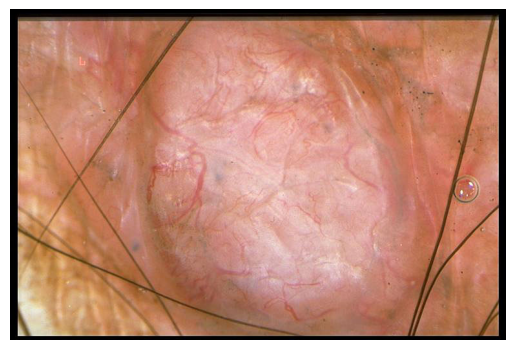

In [11]:
img = plt.imread(meta_df.derm.loc[0])
plt.imshow(img)
plt.axis('off')

In [12]:
img.dtype

dtype('uint8')

In [13]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   case_num                        1011 non-null   int64 
 1   diagnosis                       1011 non-null   object
 2   seven_point_score               1011 non-null   int64 
 3   pigment_network                 1011 non-null   object
 4   streaks                         1011 non-null   object
 5   pigmentation                    1011 non-null   object
 6   regression_structures           1011 non-null   object
 7   dots_and_globules               1011 non-null   object
 8   blue_whitish_veil               1011 non-null   object
 9   vascular_structures             1011 non-null   object
 10  level_of_diagnostic_difficulty  1011 non-null   object
 11  elevation                       1011 non-null   object
 12  location                        1011 non-null   

In [14]:
meta_df.management

0                     excision
1                     excision
2                     excision
3                     excision
4                     excision
                 ...          
1006    no further examination
1007                  excision
1008        clinical follow up
1009    no further examination
1010                  excision
Name: management, Length: 1011, dtype: object

In [15]:
meta_df.drop(axis = 1, columns = 'management', inplace = True)
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   case_num                        1011 non-null   int64 
 1   diagnosis                       1011 non-null   object
 2   seven_point_score               1011 non-null   int64 
 3   pigment_network                 1011 non-null   object
 4   streaks                         1011 non-null   object
 5   pigmentation                    1011 non-null   object
 6   regression_structures           1011 non-null   object
 7   dots_and_globules               1011 non-null   object
 8   blue_whitish_veil               1011 non-null   object
 9   vascular_structures             1011 non-null   object
 10  level_of_diagnostic_difficulty  1011 non-null   object
 11  elevation                       1011 non-null   object
 12  location                        1011 non-null   

In [16]:
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
from torchvision.transforms import v2
%matplotlib inline

c:\Python39\lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
c:\Python39\lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [18]:
import matplotlib.pyplot as plt
from pandas.core.common import flatten
import copy
import numpy as np
import random

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader

import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

import glob
from tqdm import tqdm

In [19]:
train_img_df = meta_df.iloc[train_indexes][['derm', 'diagnosis']].reset_index(drop = True)
valid_img_df = meta_df.iloc[valid_indexes][['derm', 'diagnosis']].reset_index(drop = True)
test_img_df = meta_df.iloc[test_indexes][['derm', 'diagnosis']].reset_index(drop = True)


In [20]:
train_img_df.shape, valid_img_df.shape, test_img_df.shape

((413, 2), (203, 2), (395, 2))

In [21]:
train_transforms = A.Compose(
    [
        A.SmallestMaxSize(max_size=350),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=360, p=0.5),
        A.RandomCrop(height=256, width=256),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)

test_transforms = A.Compose(
    [
        A.SmallestMaxSize(max_size=350),
        A.CenterCrop(height=256, width=256),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)

In [22]:
list(meta_df.diagnosis.unique())

['basal cell carcinoma',
 'blue nevus',
 'clark nevus',
 'combined nevus',
 'congenital nevus',
 'dermal nevus',
 'dermatofibroma',
 'lentigo',
 'melanoma (in situ)',
 'melanoma (less than 0.76 mm)',
 'melanoma (0.76 to 1.5 mm)',
 'melanoma (more than 1.5 mm)',
 'melanoma metastasis',
 'melanosis',
 'miscellaneous',
 'recurrent nevus',
 'reed or spitz nevus',
 'seborrheic keratosis',
 'vascular lesion',
 'melanoma']

In [23]:
# diagnosis = pd.DataFrame([
#         {'nums': 0, 'names': 'basal cell carcinoma', 'abbrevs': 'BCC', 'info': 'Common non-melanoma cancer'},
#         {'nums': 1, 'names': 'blue nevus', 'abbrevs': 'BLN'},
#         {'nums': 2, 'names': 'clark nevus', 'abbrevs': 'CN'},
#         {'nums': 3, 'names': 'combined nevus', 'abbrevs': 'CBN'},
#         {'nums': 4, 'names': 'congenital nevus', 'abbrevs': 'CGN'},
#         {'nums': 5, 'names': 'dermal nevus', 'abbrevs': 'DN'},
#         {'nums': 6, 'names': 'dermatofibroma', 'abbrevs': 'DF'},
#         {'nums': 7, 'names': 'lentigo', 'abbrevs': 'LT'},
#         {'nums': 8, 'names': ['melanoma', 'melanoma (in situ)', 'melanoma (less than 0.76 mm)',
#                               'melanoma (0.76 to 1.5 mm)', 'melanoma (more than 1.5 mm)',
#                               'melanoma metastasis'], 'abbrevs': 'MEL'},
#         {'nums': 9, 'names': 'melanosis', 'abbrevs': 'MLS', 'info': 'Hyperpigmentation of the skin.'},
#         {'nums': 10, 'names': 'miscellaneous', 'abbrevs': 'MISC'},
#         {'nums': 11, 'names': 'recurrent nevus', 'abbrevs': 'RN'},
#         {'nums': 12, 'names': 'reed or spitz nevus', 'abbrevs': 'RSN'},
#         {'nums': 13, 'names': 'seborrheic keratosis', 'abbrevs': 'SK'},
#         {'nums': 14, 'names': 'vascular lesion', 'abbrevs': 'VL'},
#     ])
# diagnosis.drop(axis = 1, columns = 'info', inplace = True)
# diagnosis

In [24]:
idx_to_class = {0: 'basal cell carcinoma',
 1: 'blue nevus',
 2: 'clark nevus',
 3: 'combined nevus',
 4: 'congenital nevus',
 5: 'dermal nevus',
 6: 'dermatofibroma',
 7: 'lentigo',
 8: ['melanoma',
  'melanoma (in situ)',
  'melanoma (less than 0.76 mm)',
  'melanoma (0.76 to 1.5 mm)',
  'melanoma (more than 1.5 mm)',
  'melanoma metastasis'],
 9: 'melanosis',
 10: 'miscellaneous',
 11: 'recurrent nevus',
 12: 'reed or spitz nevus',
 13: 'seborrheic keratosis',
 14: 'vascular lesion'}

In [25]:
idx_to_class

{0: 'basal cell carcinoma',
 1: 'blue nevus',
 2: 'clark nevus',
 3: 'combined nevus',
 4: 'congenital nevus',
 5: 'dermal nevus',
 6: 'dermatofibroma',
 7: 'lentigo',
 8: ['melanoma',
  'melanoma (in situ)',
  'melanoma (less than 0.76 mm)',
  'melanoma (0.76 to 1.5 mm)',
  'melanoma (more than 1.5 mm)',
  'melanoma metastasis'],
 9: 'melanosis',
 10: 'miscellaneous',
 11: 'recurrent nevus',
 12: 'reed or spitz nevus',
 13: 'seborrheic keratosis',
 14: 'vascular lesion'}

In [26]:
class_to_idx = dict()
for key, value in idx_to_class.items():
    if isinstance(value, list):
        for i in value:
            class_to_idx[i] = key
    else:
        class_to_idx[value] = key

class_to_idx  

{'basal cell carcinoma': 0,
 'blue nevus': 1,
 'clark nevus': 2,
 'combined nevus': 3,
 'congenital nevus': 4,
 'dermal nevus': 5,
 'dermatofibroma': 6,
 'lentigo': 7,
 'melanoma': 8,
 'melanoma (in situ)': 8,
 'melanoma (less than 0.76 mm)': 8,
 'melanoma (0.76 to 1.5 mm)': 8,
 'melanoma (more than 1.5 mm)': 8,
 'melanoma metastasis': 8,
 'melanosis': 9,
 'miscellaneous': 10,
 'recurrent nevus': 11,
 'reed or spitz nevus': 12,
 'seborrheic keratosis': 13,
 'vascular lesion': 14}

In [27]:
from torch.utils.data import Dataset

In [28]:
train_img_df.iloc[0].derm

'D:/COLLEGE/PROJECTS/(incomplete) 7 point checklist/derm7pt/release_v0\\images/NFL/Nfl068.jpg'

In [29]:
class OurDataset(Dataset):
    def __init__(self, df, transform=False):
        self.df = df
        self.transform = transform
        
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_filepath = self.df.iloc[idx, 0]
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        label = self.df.iloc[idx, 1]
        label = class_to_idx[label]
        if self.transform is not None:
            image = self.transform(image=image)["image"]
        
        return image, label


In [30]:
train_dataset = OurDataset(train_img_df,train_transforms)
valid_dataset = OurDataset(valid_img_df,test_transforms) #test transforms are applied
test_dataset = OurDataset(test_img_df,test_transforms)

In [31]:

print('The shape of tensor for 50th image in train dataset: ',train_dataset[49][0].shape)
print('The label for 50th image in train dataset: ',train_dataset[49][1])

The shape of tensor for 50th image in train dataset:  torch.Size([3, 256, 256])
The label for 50th image in train dataset:  3


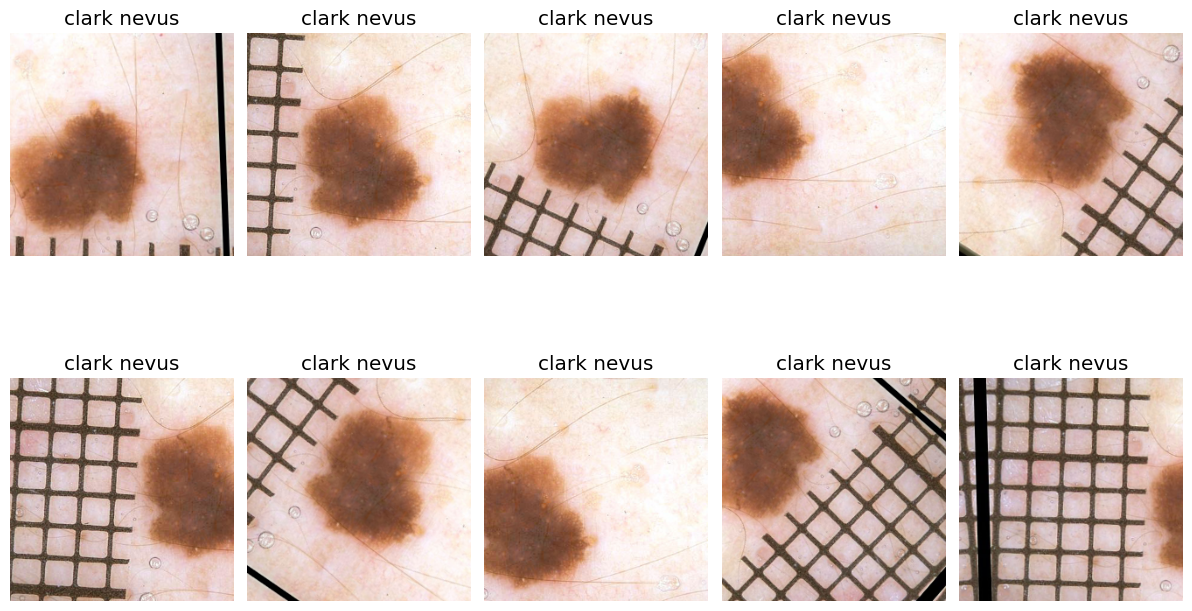

In [32]:

import matplotlib.pyplot as plt
%matplotlib inline


def visualize_augmentations(dataset, idx=0, samples=10, cols=5, random_img = False):
    
    dataset = copy.deepcopy(dataset)
    #we remove the normalize and tensor conversion from our augmentation pipeline
    dataset.transform = A.Compose([t for t in dataset.transform if not isinstance(t, (A.Normalize, ToTensorV2))])
    rows = samples // cols
    
        
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 8))
    for i in range(samples):
        if random_img:
            idx = np.random.randint(1,len(train_image_paths))
        image, lab = dataset[idx]
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_axis_off()
        ax.ravel()[i].set_title(idx_to_class[lab])
    plt.tight_layout(pad=1)
    plt.show()    

visualize_augmentations(train_dataset,11)


In [33]:
from torch.utils.data import DataLoader

In [34]:
train_loader = DataLoader(
    train_dataset, batch_size=16, shuffle=True
)

valid_loader = DataLoader(
    valid_dataset, batch_size=16, shuffle=True
)


test_loader = DataLoader(
    test_dataset, batch_size=16, shuffle=False
)

In [35]:
# next(iter(train_loader))[0].shape, next(iter(train_loader))[1].shape


In [36]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [37]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [38]:
class CnnModel2(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.wide_resnet101_2(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, 15)
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))

In [39]:
model = CnnModel2()

c:\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet101_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet101_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [40]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [41]:
device = get_default_device()
device
# device = torch.device('cpu')
# device

device(type='cuda')

In [42]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(valid_loader, device)
test_dl = DeviceDataLoader(test_loader, device)
to_device(model, device)

CnnModel2(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
  

In [43]:
torch.cuda.empty_cache()

In [44]:
model = to_device(CnnModel2(), device)

for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([16, 3, 256, 256])
out.shape: torch.Size([16, 15])
out[0]: tensor([0.4886, 0.5004, 0.3938, 0.5214, 0.4390, 0.4172, 0.5185, 0.3853, 0.4923,
        0.5626, 0.4759, 0.5140, 0.5476, 0.5129, 0.5058], device='cuda:0',
       grad_fn=<SelectBackward0>)


In [45]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    
def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
     # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
             
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [46]:
history = [evaluate(model, val_dl)]
history

[{'val_loss': 2.718674898147583, 'val_acc': 0.04326923191547394}]

In [47]:
epochs = int(np.random.choice([3, 5, 7, 9, 11, 13, 15]))
max_lr = np.random.choice([1e-3, 5e-3, 1e-4, 5e-4, 1e-5, 5e-5, 1e-6])
grad_clip = np.random.choice([0.5, 0.4, 0.3, 0.2, 0.1, 0.05])
weight_decay = np.random.choice([1e-2, 5e-2, 1e-3, 5e-3, 1e-4, 5e-4, 1e-5])
opt_func = torch.optim.Adam
print('epoch = ', epochs, 'lr = ', max_lr, 'grad is ', grad_clip, 'weights = ', weight_decay)

epoch =  5 lr =  1e-05 grad is  0.1 weights =  0.0001


In [48]:
torch.cuda.empty_cache()


history += fit_one_cycle(epochs, max_lr, model, train_dl, val_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 4.00 GiB total capacity; 6.97 GiB already allocated; 0 bytes free; 7.02 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [49]:

import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
all = []
pop = evaluate(model, val_dl)['val_acc']
all.append(pop)
torch.cuda.empty_cache()
all 

In [ ]:
model = to_device(CnnModel2(), device)


In [ ]:
epochs = 11
max_lr = 5e-4
grad_clip = 0.3
weight_decay = 5e-4
opt_func = torch.optim.Adam
print('epoch = ', epochs, 'lr = ', max_lr, 'grad is ', grad_clip, 'weights = ', weight_decay)

In [1]:

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8072796912359329441
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2365063168
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13577571369113266009
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
dir_release = "D:/COLLEGE/PROJECTS/(incomplete) 7 point checklist/derm7pt/release_v0"
dir_meta = os.path.join(dir_release, 'meta')
dir_images = os.path.join(dir_release, 'images')

In [ ]:
meta_df = pd.read_csv(os.path.join(dir_meta, 'meta.csv'))
train_indexes = list(pd.read_csv(os.path.join(dir_meta, 'train_indexes.csv'))['indexes'])
valid_indexes = list(pd.read_csv(os.path.join(dir_meta, 'valid_indexes.csv'))['indexes'])
test_indexes = list(pd.read_csv(os.path.join(dir_meta, 'test_indexes.csv'))['indexes'])

In [ ]:
# The full dataset before any grouping of the labels.
derm_data = Derm7PtDataset(dir_images=dir_images, 
                        metadata_df=meta_df.copy(), # Copy as is modified.
                        train_indexes=train_indexes, valid_indexes=valid_indexes, 
                        test_indexes=test_indexes)

# The dataset after grouping infrequent labels.
derm_data_group = Derm7PtDatasetGroupInfrequent(dir_images=dir_images, 
                                             metadata_df=meta_df.copy(), # Copy as is modified.
                                             train_indexes=train_indexes, 
                                             valid_indexes=valid_indexes, 
                                             test_indexes=test_indexes)

In [ ]:
derm_data.dataset_stats()

Number of cases: 1011
Number of cases to train: 413
Number of cases to validate: 203
Number of cases to test: 395
